## OLS拟合

> 介绍       https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#Multicollinearity
> 
> **API**         https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
>
> 回归结果API  https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

rng = np.random.default_rng(seed=1)
nsample = 100

x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = rng.normal(size=nsample)

X = sm.add_constant(X)
y_true = X @ beta
y = y_true + e

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.120e+06
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          3.99e-248
Time:                        10:55:33   Log-Likelihood:                -125.52
No. Observations:                 100   AIC:                             257.0
Df Residuals:                      97   BIC:                             264.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1054      0.254      4.360      0.0

In [2]:
print(res.params) # 参数
print(res.bse) # 参数估计的标准差
print(np.sum(res.fittedvalues != res.predict()) == 0) # 预测值
print(np.sum(res.resid != y - res.predict()) == 0) # 残差
print(res.centered_tss == res.ssr + res.ess) # 总体平方和 = 残差平方和 + 回归平方和
print(res.mse_resid) # 均方误差
print(np.sum((y - res.fittedvalues)**2) - res.ssr < 1e-10) # 残差平方和

[ 1.10536362  0.02797359 10.00540738]
[0.25350685 0.11716461 0.01133737]
True
True
True
0.743008853488425
True



## F检验（只适合线性回归）

- 检验全部解释变量对被解释变量的共同影响是否显著


> https://zhuanlan.zhihu.com/p/416539060

## t检验

- 对每个自变量进行显著性检验

> https://zhuanlan.zhihu.com/p/453705451

## 显著性水平

- 显著性水平α在统计学中叫做犯第一类错误的大小，第一类错误就是原假设是对的，但是被拒绝的概率，我们一般把这个**显著性水平α定为0.05**。

- 在**非线性回归**中，不可以用p值检验相关显著性， 因为在非线性回归中，残差均值平方不再是误差方差的无偏估计，因而不能使用线性模型的检验方法来检验非线性模型，从而不能用F统计量及其P值进行检验。

In [3]:
print(res.aic)
print(res.bic)
print(res.rsquared) # ******************
print(res.rsquared_adj) # ******************
print('-'*30)

print(res.f_pvalue) # F统计量的p值 # ******************
# print(res.fvalue) # 完全指定模型的F统计量
print('-'*30)

print(res.pvalues) # 参数t统计量的双尾p值 # ******************
# print(res.tvalues) # 返回给定参数估计的t统计量

257.0370540455248
264.8525646034891
0.9999920751325189
0.9999919117331894
------------------------------
3.9912820866090676e-248
------------------------------
[3.23668366e-005 8.11799591e-001 3.37427286e-191]


## 残差分析-可视化

- 如果残差曲线的均值为0，且以相似的密度分布在x轴上，则能表明拟合的线形图是合适的。
- 如果残差值，在x轴上有明显的趋势，像一条曲线或者弯曲的圆弧，有一定的趋势的话，说明这个残差值随之x轴的变化而有规律地变化，而不是随机分离的，则说明我们一开始假设原始数据服从线性函数的想法是错误的，因此，得到的线性模型也是不正确的。

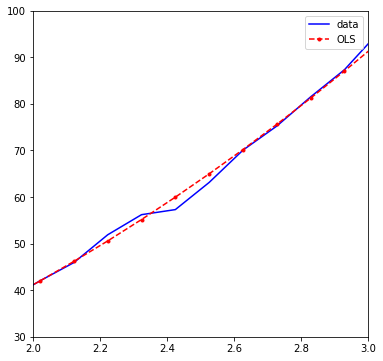

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

# ax.plot(x, y, "o", label="data")
ax.plot(x, y, "b-", label="data")
# ax.plot(x, y_true, "b--", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.set_xlim(2, 3)
ax.set_ylim(30, 100)
ax.legend(loc="best")
plt.show()

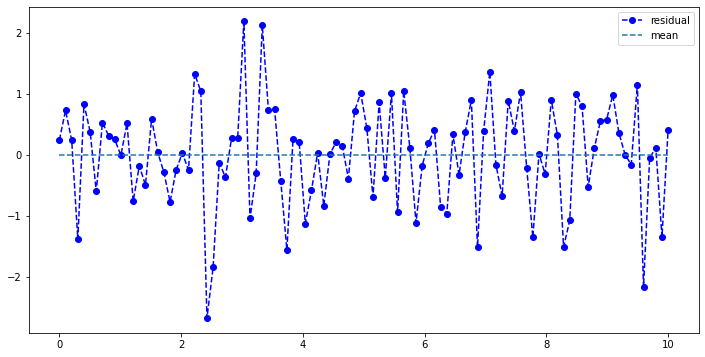

0.8489514637974143


In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, res.resid, 'b--o', label='residual')
ax.plot(x, np.full_like(x, res.resid.mean()), '--', label='mean')
ax.legend(loc="best")
plt.show()

print(res.resid.std()) # 标准差

## 标准化？

- 当需要比较多个自变量对因变量**相对作用大小**时，可采用标准化回归系数（常数项是没有值的）
- 当只是想解释自变量对因变量的作用时，用非标准化的回归系数。

## 正态性检验：pp图，qq图

> https://zhuanlan.zhihu.com/p/424351716



P-P图和Q-Q图都是用来观察变量是否服从正太分布的。

P-P图是根据变量的累积概率对应于所指定的理论分布累积概率绘制的散点图，用于直观地检测样本数据是否符合某一概率分布。如果被检验的数据符合所指定的分布，则代表样本数据的点应当基本在代表理论分布的对角线上。

Q-Q图的结果与P-P图非常相似，只是P-P图是用分布的累计比，而Q-Q图用的是分布的分位数来做检验。和P-P图一样，如果数据为正态分布，则在Q-Q正态分布图中，数据点应基本在图中对角线上。

由于P-P图和Q-Q图的用途完全相同，只是检验方法存在差异。要利用QQ图鉴别样本数据是否近似于正态分布，只需看QQ图上的点是否近似地在一条直线附近，**而且该直线的斜率为标准差，截距为均值。**

QQ图和PP图的定义方式一样，二者的区别是pp图比较的是真实的数据和待检验分布的累计概率，而qq图比较的是真实数据和待检验分布的分位点数。

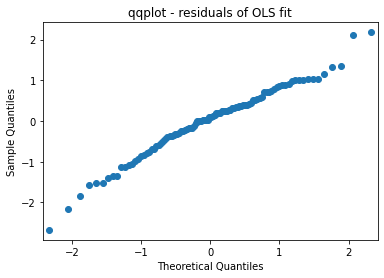

In [6]:
pplot = sm.ProbPlot(res.resid)
pplot.qqplot()
plt.title("qqplot - residuals of OLS fit")
plt.show()

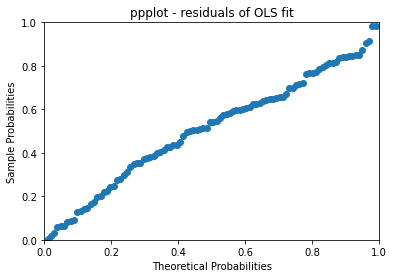

In [7]:
pplot = sm.ProbPlot(res.resid)
pplot.ppplot()
plt.title("ppplot - residuals of OLS fit")
plt.show()